# Support Vector Machines

In [169]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [170]:
# Load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [171]:

# Define features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

In [172]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [173]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [174]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Select only two features for visualization
X_train_2d = X_train.iloc[:, :2].values
X_test_2d = X_test.iloc[:, :2].values

In [176]:
# Train the SVM model with RBF kernel
model_2d = SVC(kernel='rbf')
model_2d.fit(X_train_2d, y_train)

SVC()

In [178]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    
    # Plot training points with color based on species
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

    # Create a custom legend
    unique_labels = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]
    plt.legend(handles, label_encoder.inverse_transform(unique_labels), title="Species", loc='upper right')

    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

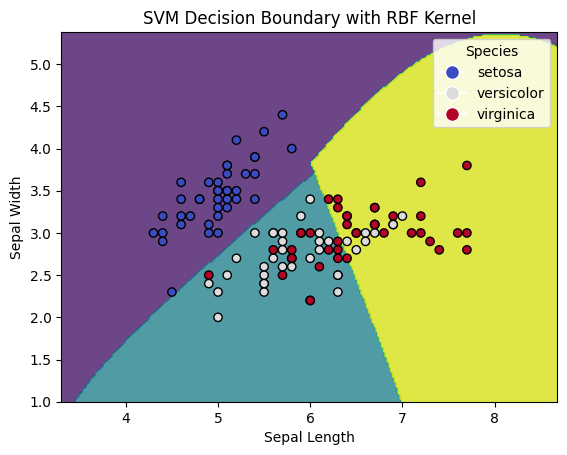

In [179]:
# Call the function to plot the decision boundary
plot_decision_boundary(X_train_2d, y_train, model_2d)

In [144]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [145]:
# Load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [146]:
# Check missing values 
df.isnull().sum() / len(df) * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [147]:
# Define X and y
X = df.drop('species', axis=1)
y = df['species']

In [148]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [149]:
# Spilt the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [150]:
# Call the model
model = SVC(kernel='rbf')

In [151]:
# Train the model
model.fit(X_train, y_train)

SVC()

In [81]:
# Make predictions
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(95.72222222222221, 0.5, 'Actual')

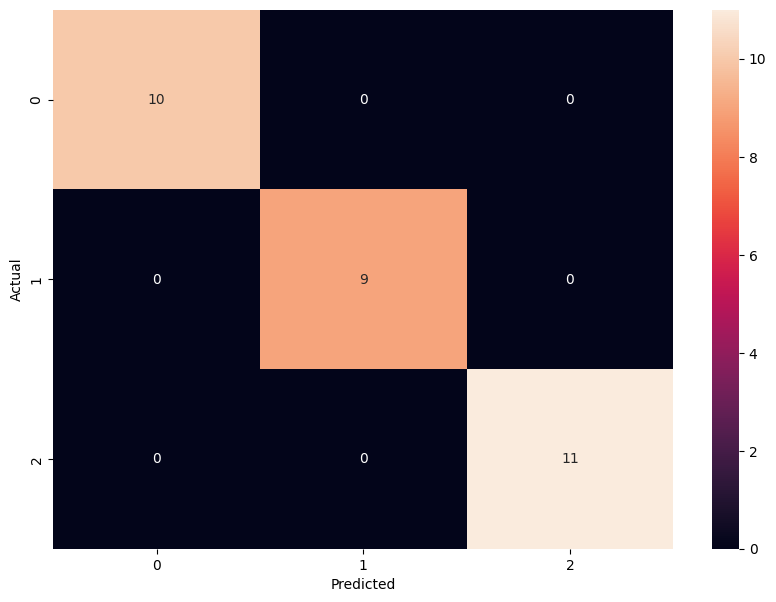

In [83]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')